In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#read the file
data = pd.read_csv("./files_for_lab/customer_churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
for col in data:
    print(data[col].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [6]:
cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(" ","_"))
    
data.columns = cols


In [7]:
data['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [8]:
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
#Extract the target variable
target = data['churn']

#Extract the independent variables and scale them.
ind_vars = data[['tenure','seniorcitizen','monthlycharges']]

In [10]:
target = target.apply(lambda x: str(x).replace('Yes', '1').replace('No', '0')).astype(int)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ind_vars[['tenure','seniorcitizen','monthlycharges']] = scaler.fit_transform(ind_vars[['tenure','seniorcitizen','monthlycharges']])

ind_vars

<ipython-input-11-1ceef4f128c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_vars[['tenure','seniorcitizen','monthlycharges']] = scaler.fit_transform(ind_vars[['tenure','seniorcitizen','monthlycharges']])
C:\Users\fmfdu\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,tenure,seniorcitizen,monthlycharges
0,0.013889,0.0,0.115423
1,0.472222,0.0,0.385075
2,0.027778,0.0,0.354229
3,0.625000,0.0,0.239303
4,0.027778,0.0,0.521891
...,...,...,...
7038,0.333333,0.0,0.662189
7039,1.000000,0.0,0.845274
7040,0.152778,0.0,0.112935
7041,0.055556,1.0,0.558706


In [12]:
df = pd.concat([target, ind_vars], axis=1)

In [13]:
df01 = df.copy()

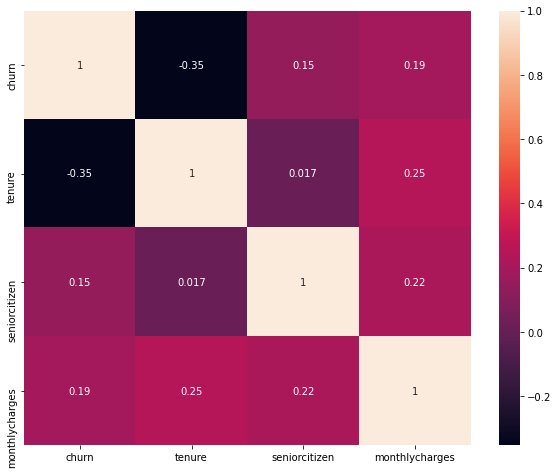

In [14]:
#Build the logistic regression model.

corr_matrix=df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

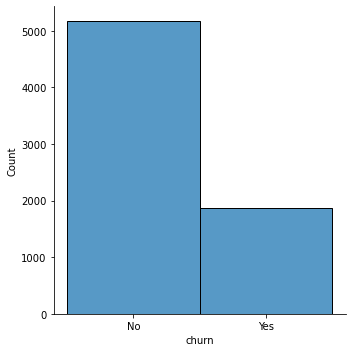

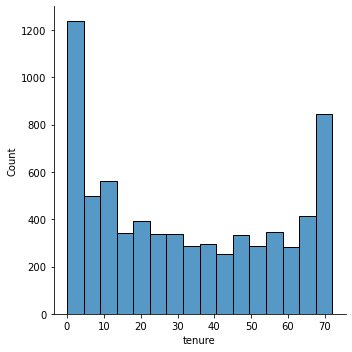

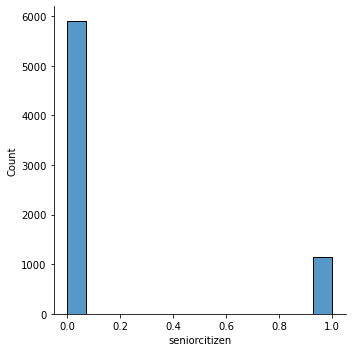

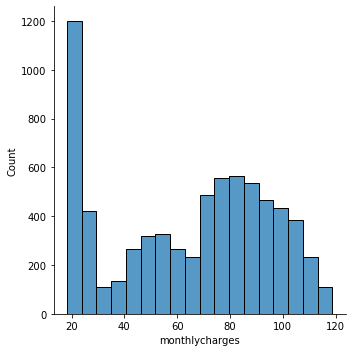

In [15]:
for col in df.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

In [16]:
#Using SMOTE

smote = SMOTE()

X = df01.drop('churn', axis=1)
y = df01['churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_sm, y_sm = smote.fit_resample(X_train,y_train)

y_sm.value_counts()

0    4138
1    4138
Name: churn, dtype: int64

In [19]:
classification = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=500) # max_iter #multiclass multinomial é o problema
classification.fit(X_sm, y_sm)

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [20]:
#Evaluate the model.
classification.score(X_test, y_test)


0.7423704755145494

In [21]:
predictions = classification.predict(X_test)

pd.Series(predictions).value_counts()

0    849
1    560
dtype: int64

In [22]:
y_test.value_counts()

0    1036
1     373
Name: churn, dtype: int64

In [23]:
confusion_matrix(y_test, predictions)

array([[761, 275],
       [ 88, 285]], dtype=int64)

<AxesSubplot:>

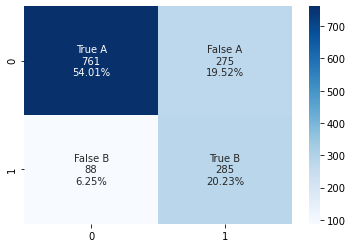

In [24]:
cf_matrix = confusion_matrix(y_test, predictions)
y_true = y_test
y_pred = predictions
confusion_matrix(y_true, y_pred)

group_names = ['True A', 'False A', 'False B', 'True B']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [25]:
from sklearn import metrics

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1036
           1       0.51      0.76      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.76      1409



On the 1st try - The model gives around 80% accuracy probably due to the fact that the data is not close to balanced having a lot more "No"=5174 than "Yes"=1869 which means that even if the model predicted all "No" it would still have a 70%+ accuracy representing a not so good model. The model evaluated 0.8055358410220014 and CM= array([[958,  78],[196, 177]], dtype=int64) with no SMOTE.

In [26]:
#9.Build and evaluate the logistic regression model. Is it there any improvement?

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks 


tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train,y_train)

classification.fit(X_res,y_res)
predictions = classification.predict(X_test)


In [27]:
confusion_matrix(y_test, predictions)

array([[913, 123],
       [168, 205]], dtype=int64)

<AxesSubplot:>

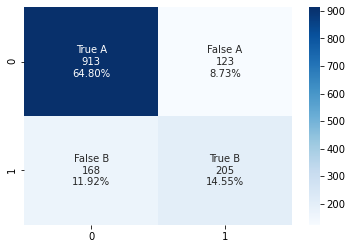

In [28]:
cf_matrix = confusion_matrix(y_test, predictions)
y_true = y_test
y_pred = predictions
confusion_matrix(y_true, y_pred)

group_names = ['True A', 'False A', 'False B', 'True B']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [29]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



From the results and the confusion matrixes we can observe that TomekLinks was not the best one.